IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings('ignore')

LOADING DATASET

In [4]:
df=pd.read_csv('datafile.csv')
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  20-07-2016  
1  10-08-2016  
2  19-08-2016  
3  06-06-2016  
4  22-06-2016  

[5 rows x 37 columns]

In [5]:
df.shape

(209593, 37)

we have 209593 rows and 37 columns in dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

information about dataset

In [7]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

showing that ,columns belongs to which type of data

In [8]:
df.keys()

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [9]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

showing columns name

STATISTICAL SUMMARY

In [10]:
df.describe()

Unnamed: 0          label            aon   daily_decr30  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean   104797.000000       0.875177    8112.343445    5381.402289   
std     60504.431823       0.330519   75696.082531    9220.623400   
min         1.000000       0.000000     -48.000000     -93.012667   
25%     52399.000000       1.000000     246.000000      42.440000   
50%    104797.000000       1.000000     527.000000    1469.175667   
75%    157195.000000       1.000000     982.000000    7244.000000   
max    209593.000000       1.000000  999860.755200  265926.000000   

        daily_decr90       rental30       rental90  last_rech_date_ma  \
count  209593.000000  209593.000000  209593.000000       209593.00000   
mean     6082.515068    2692.581910    3483.406534         3755.84780   
std     10918.812767    4308.586781    5770.461279        53905.89223   
min       -93.012667  -23737.140000  -24720.580000          -29.00000   
25%        42.692000     280.420000     300.260000            1.00000   
50%      1500.000000    1083.570000    1334.000000            3.00000   
75%      7802.790000    3356.940000    4201.790000            7.00000   
max    320630.000000  198926.110000  200148.110000       998650.37770   

       last_rech_date_da  last_rech_amt_ma  ...    cnt_loans30   amnt_loans30  \
count      209593.000000     209593.000000  ...  209593.000000  209593.000000   
mean         3712.202921       2064.452797  ...       2.758981      17.952021   
std         53374.833430       2370.786034  ...       2.554502      17.379741   
min           -29.000000          0.000000  ...       0.000000       0.000000   
25%             0.000000        770.000000  ...       1.000000       6.000000   
50%             0.000000       1539.000000  ...       2.000000      12.000000   
75%             0.000000       2309.000000  ...       4.000000      24.000000   
max        999171.809400      55000.000000  ...      50.000000     306.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    209593.000000       209593.000000  209593.000000  209593.000000   
mean        274.658747            0.054029      18.520919      23.645398   
std        4245.264648            0.218039     224.797423      26.469861   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       2.000000      12.000000   
75%           6.000000            0.000000       5.000000      30.000000   
max       99864.560860            3.000000    4997.517944     438.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    209593.000000       209593.000000  209593.000000  209593.000000  
mean          6.703134            0.046077       3.398826       4.321485  
std           2.103864            0.200692       8.813729      10.308108  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       1.666667  
75%           6.000000            0.000000       3.750000       4.500000  
max          12.000000            3.000000     171.500000     171.500000  

[8 rows x 34 columns]

we can see here value counts for each column ,mean ,median , standard deviation , 25% to maximum and we can also find skewness in this

CHECKING NULL VALUES

In [11]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

no null values

<AxesSubplot:>

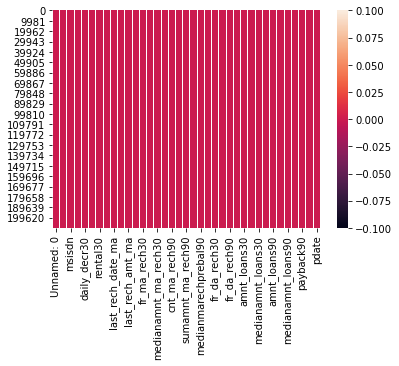

In [12]:
sns.heatmap(df.isnull())

no null values

EDA


UNIVARIATE ANALYSIS

In [13]:
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

Text(0.5, 1.0, 'defaulters vs non-defaulters')

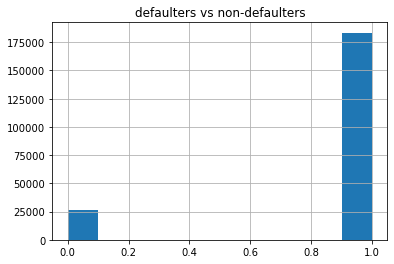

In [14]:
df['label'].hist(grid=True)
plt.title('defaulters vs non-defaulters')

0 is indicating defaulters and 1 is indicating non defaulters


there is very big difference between defaulters and non-defaulters

MULTIVARIATE ANALYSIS


CHECKING CORRELATION

In [15]:
cor=df.corr()

In [16]:
cor

Unnamed: 0     label       aon  daily_decr30  \
Unnamed: 0              1.000000  0.000403 -0.002048      0.002739   
label                   0.000403  1.000000 -0.003785      0.168298   
aon                    -0.002048 -0.003785  1.000000      0.001104   
daily_decr30            0.002739  0.168298  0.001104      1.000000   
daily_decr90            0.003077  0.166150  0.000374      0.977704   
rental30               -0.003906  0.058085 -0.000960      0.442066   
rental90               -0.003459  0.075521 -0.000790      0.458977   
last_rech_date_ma      -0.001853  0.003728  0.001692      0.000487   
last_rech_date_da      -0.001133  0.001711 -0.001693     -0.001636   
last_rech_amt_ma       -0.001064  0.131804  0.004256      0.275837   
cnt_ma_rech30           0.003320  0.237331 -0.003148      0.451385   
fr_ma_rech30            0.003181  0.001330 -0.001163     -0.000577   
sumamnt_ma_rech30       0.000123  0.202828  0.000707      0.636536   
medianamnt_ma_rech30   -0.001371  0.141490  0.004306      0.295356   
medianmarechprebal30    0.001258 -0.004829  0.003930     -0.001153   
cnt_ma_rech90           0.002329  0.236392 -0.002725      0.587338   
fr_ma_rech90           -0.000249  0.084385  0.004401     -0.078299   
sumamnt_ma_rech90       0.000523  0.205793  0.001011      0.762981   
medianamnt_ma_rech90   -0.000298  0.120855  0.004909      0.257847   
medianmarechprebal90   -0.001947  0.039300 -0.000859      0.037495   
cnt_da_rech30           0.000888  0.003827  0.001564      0.000700   
fr_da_rech30           -0.002504 -0.000027  0.000892     -0.001499   
cnt_da_rech90          -0.001324  0.002999  0.001121      0.038814   
fr_da_rech90           -0.002827 -0.005418  0.005395      0.020673   
cnt_loans30             0.001725  0.196283 -0.001826      0.366116   
amnt_loans30            0.002387  0.197272 -0.001726      0.471492   
maxamnt_loans30         0.000698  0.000248 -0.002764     -0.000028   
medianamnt_loans30     -0.002005  0.044589  0.004664     -0.011610   
cnt_loans90             0.002241  0.004733 -0.000611      0.008962   
amnt_loans90            0.000781  0.199788 -0.002319      0.563496   
maxamnt_loans90         0.001742  0.084144 -0.001191      0.400199   
medianamnt_loans90     -0.002615  0.035747  0.002771     -0.037305   
payback30              -0.000040  0.048336  0.001940      0.026915   
payback90               0.002411  0.049183  0.002203      0.047175   

                      daily_decr90  rental30  rental90  last_rech_date_ma  \
Unnamed: 0                0.003077 -0.003906 -0.003459          -0.001853   
label                     0.166150  0.058085  0.075521           0.003728   
aon                       0.000374 -0.000960 -0.000790           0.001692   
daily_decr30              0.977704  0.442066  0.458977           0.000487   
daily_decr90              1.000000  0.434685  0.471730           0.000908   
rental30                  0.434685  1.000000  0.955237          -0.001095   
rental90                  0.471730  0.955237  1.000000          -0.001688   
last_rech_date_ma         0.000908 -0.001095 -0.001688           1.000000   
last_rech_date_da        -0.001886  0.003261  0.002794           0.001790   
last_rech_amt_ma          0.264131  0.127271  0.121416          -0.000147   
cnt_ma_rech30             0.426707  0.233343  0.230260           0.004311   
fr_ma_rech30             -0.000343 -0.001219 -0.000503          -0.001629   
sumamnt_ma_rech30         0.603886  0.272649  0.259709           0.002105   
medianamnt_ma_rech30      0.282960  0.129853  0.120242          -0.001358   
medianmarechprebal30     -0.000746 -0.001415 -0.001237           0.004071   
cnt_ma_rech90             0.593069  0.312118  0.345293           0.004263   
fr_ma_rech90             -0.079530 -0.033530 -0.036524           0.001414   
sumamnt_ma_rech90         0.768817  0.342306  0.360601           0.002243   
medianamnt_ma_rech90      0.250518  0.110356  0.103151          -0.000726   
medianmarechprebal90      0.036

<AxesSubplot:>

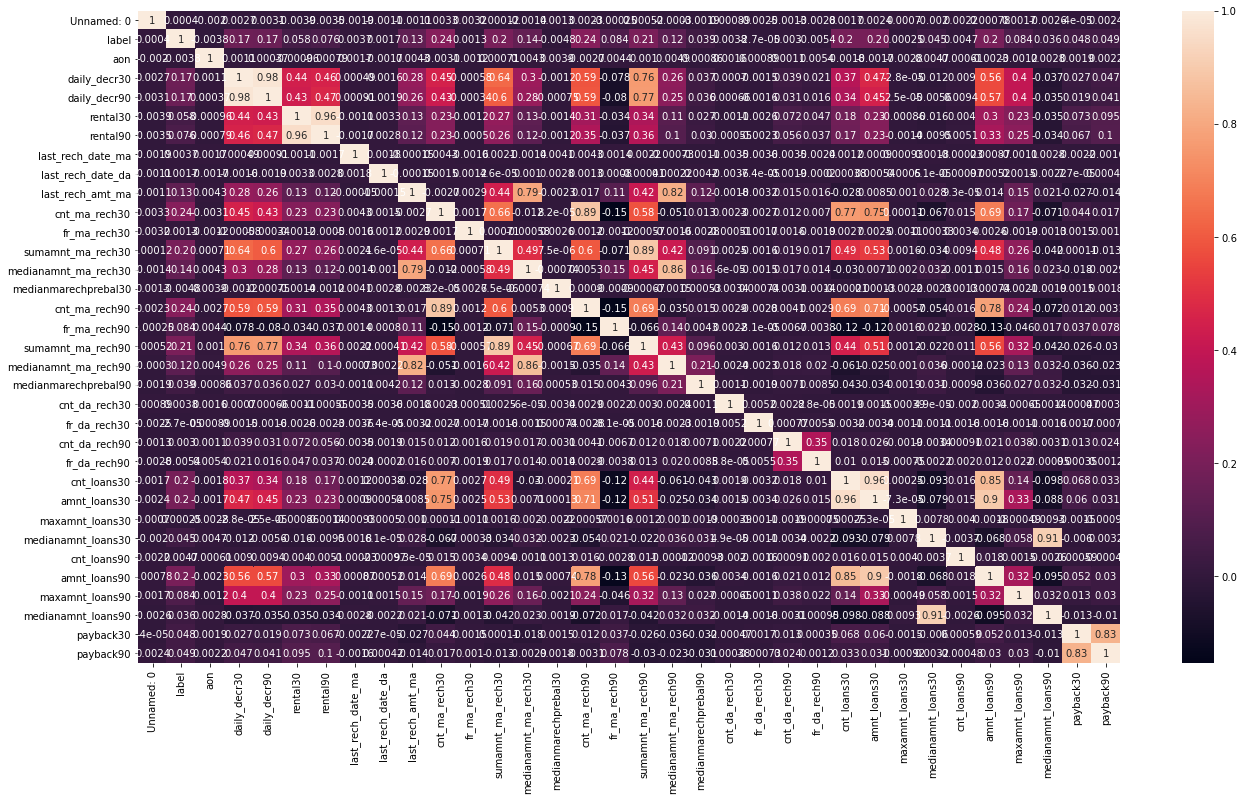

In [17]:
plt.figure(figsize=[22,12])
sns.heatmap(cor, annot=True)

unable to identify the correlation in above heatmap due to huge number of columns

In [18]:
corr_matrix=df.corr()
corr_matrix['label'].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166150
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003728
cnt_da_rech90           0.002999
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
Unnamed: 0              0.000403
maxamnt_loans30         0.000248
fr_da_rech

we can identify the correlation with independent variable with target variable 'label'. there are some variables which is less than 0.01 ,so they are showing week relationship

LABEL ENOCER for covertig string values

In [19]:
from sklearn.preprocessing import LabelEncoder
cols=['msisdn','pcircle','pdate']
le=LabelEncoder()
for col in cols:
    df[col]=le.fit_transform(df[col])

In [20]:
df.head()

Unnamed: 0  label  msisdn    aon  daily_decr30  daily_decr90  rental30  \
0           1      0   40191  272.0   3055.050000   3065.150000    220.13   
1           2      1  142291  712.0  12122.000000  12124.750000   3691.26   
2           3      1   33594  535.0   1398.000000   1398.000000    900.13   
3           4      1  104157  241.0     21.228000     21.228000    159.42   
4           5      1    6910  947.0    150.619333    150.619333   1098.90   

   rental90  last_rech_date_ma  last_rech_date_da  ...  maxamnt_loans30  \
0    260.13                2.0                0.0  ...              6.0   
1   3691.26               20.0                0.0  ...             12.0   
2    900.13                3.0                0.0  ...              6.0   
3    159.42               41.0                0.0  ...              6.0   
4   1098.90                4.0                0.0  ...              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90  pcircle  pdate  
0                 0.0  29.000000  29.000000        0     58  
1                 0.0   0.000000   0.000000        0     29  
2                 0.0   0.000000   0.000000        0     56  
3                 0.0   0.000000   0.000000        0     15  
4                 0.0   2.333333   2.333333        0     63  

[5 rows x 37 columns]

string data has been coverted into integer

SPLITTING THE INDEPENDENT AND TARGET VARIABLE

In [21]:
x=df.drop('label',axis=1)
y=df['label']

In [22]:
x.shape

(209593, 36)

In [23]:
y.shape

(209593,)

CHECKING SKEWNESS

In [24]:
x.skew()

Unnamed: 0               0.000000
msisdn                   0.000719
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90  

data is in range between +5 and -5 is ok but those data ,which are not in range between +5 and -5 is skewed

example:aon ,last_rech_date_ma ,last_rech_date_da ,fr_ma_rech30 ,sumamnt_ma_rech30 ,medianmarechprebal30 ,medianmarechprebal90 ,cnt_da_rech30 ,fr_da_rech30 ,cnt_da_rech90 ,fr_da_rech90 ,maxamnt_loans30 ,cnt_loans90 ,payback30 ,payback90

above columns belongs to skewed data

REMOVING SKEWNESS

In [25]:
from sklearn.preprocessing import power_transform
new1_df=power_transform(x)

new1_df=pd.DataFrame(new1_df,columns=x.columns)

In [26]:
new1_df.skew()

Unnamed: 0               -0.291503
msisdn                   -0.291511
aon                       1.654517
daily_decr30             -6.582718
daily_decr90             -7.080191
rental30                 -1.022844
rental90                 -0.962717
last_rech_date_ma        -5.362530
last_rech_date_da      -106.606657
last_rech_amt_ma         -0.061262
cnt_ma_rech30            -0.000145
fr_ma_rech30              0.165015
sumamnt_ma_rech30        -0.291322
medianamnt_ma_rech30     -0.189628
medianmarechprebal30     -0.119058
cnt_ma_rech90            -0.002465
fr_ma_rech90              0.142952
sumamnt_ma_rech90        -0.192158
medianamnt_ma_rech90     -0.044604
medianmarechprebal90      7.506286
cnt_da_rech30             6.925820
fr_da_rech30             11.390665
cnt_da_rech90             6.006577
fr_da_rech90             15.469700
cnt_loans30               0.036243
amnt_loans30              0.001948
maxamnt_loans30          -1.680107
medianamnt_loans30        3.447735
cnt_loans90         

skewness removed from most of the column but in some columns skewness is available ,so we have to remove it by other method

In [27]:
new1_df['last_rech_date_da']=np.sqrt(df['last_rech_date_da'])
new1_df['daily_decr30']=np.sqrt(df['daily_decr30'])
new1_df['daily_decr90']=np.sqrt(df['daily_decr90'])
new1_df['medianmarechprebal90']=np.sqrt(df['medianmarechprebal90'])


In [28]:
new1_df.skew()

Unnamed: 0              -0.291503
msisdn                  -0.291511
aon                      1.654517
daily_decr30             1.122053
daily_decr90             1.226440
rental30                -1.022844
rental90                -0.962717
last_rech_date_ma       -5.362530
last_rech_date_da       14.241534
last_rech_amt_ma        -0.061262
cnt_ma_rech30           -0.000145
fr_ma_rech30             0.165015
sumamnt_ma_rech30       -0.291322
medianamnt_ma_rech30    -0.189628
medianmarechprebal30    -0.119058
cnt_ma_rech90           -0.002465
fr_ma_rech90             0.142952
sumamnt_ma_rech90       -0.192158
medianamnt_ma_rech90    -0.044604
medianmarechprebal90     4.182553
cnt_da_rech30            6.925820
fr_da_rech30            11.390665
cnt_da_rech90            6.006577
fr_da_rech90            15.469700
cnt_loans30              0.036243
amnt_loans30             0.001948
maxamnt_loans30         -1.680107
medianamnt_loans30       3.447735
cnt_loans90              0.105580
amnt_loans90  

i have tried removing skewness in more column but the data is loosing ,

so for now most of the skewness is removed

CHECKING OUTLIERS

In [29]:
x.iloc[:,0:18].boxplot(figsize=[30,15])
plt.subplots_adjust(bottom=0.25)

In [30]:
x.iloc[:,18:].boxplot(figsize=[30,15])
plt.subplots_adjust(bottom=0.25)

some outliers are present but after applying zscore and IQR  the data is loosing ,so nut removing the outliers



HANDLING CLASS IMBALANCE PROBLEM BY OVERSAMPLING THE MINORITY CLASS

In [31]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over, y_over=SM.fit_resample(x,y)

In [32]:
y_over.value_counts()

0    183431
1    183431
Name: label, dtype: int64

now the imbalancing problem has been solved

TRAIN TEST SPLIT

In [33]:
x_train, x_test, y_train,y_test=train_test_split(x_over, y_over, test_size=.30,random_state=47)

In [34]:
x_train.shape

(256803, 36)

in x_train , we have 256803 rows and 36 columns

In [35]:
x_test.shape

(110059, 36)

in x_test, we have 110059 rows and 36 columns

In [36]:
y_train.shape

(256803,)

in y_train , we have 256803 rows

In [37]:
y_test.shape

(110059,)

in y_test ,we have 110059 rows

BUILDING MODEL

In [38]:
lr=LogisticRegression()
ad=AdaBoostClassifier()
rf=RandomForestClassifier()
dt=DecisionTreeClassifier()
gnb=GaussianNB()


In [39]:
#LogisticRegression
lr.fit(x_train, y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))
    
    

0.7404755631070608
[[45903  8878]
 [19685 35593]]
              precision    recall  f1-score   support

           0       0.70      0.84      0.76     54781
           1       0.80      0.64      0.71     55278

    accuracy                           0.74    110059
   macro avg       0.75      0.74      0.74    110059
weighted avg       0.75      0.74      0.74    110059



In [40]:
# AdaBoostClassifier
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))


0.8686976985071644
[[48156  6625]
 [ 7826 47452]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87     54781
           1       0.88      0.86      0.87     55278

    accuracy                           0.87    110059
   macro avg       0.87      0.87      0.87    110059
weighted avg       0.87      0.87      0.87    110059



In [41]:
# RandomForestClassifier
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9440209342261878
[[50775  4006]
 [ 2155 53123]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94     54781
           1       0.93      0.96      0.95     55278

    accuracy                           0.94    110059
   macro avg       0.94      0.94      0.94    110059
weighted avg       0.94      0.94      0.94    110059



In [43]:
#DecisionTreeClassifier
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.9023523746354228
[[49613  5168]
 [ 5579 49699]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90     54781
           1       0.91      0.90      0.90     55278

    accuracy                           0.90    110059
   macro avg       0.90      0.90      0.90    110059
weighted avg       0.90      0.90      0.90    110059



In [46]:
# GaussianNB
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.6924467785460525
[[49717  5064]
 [28785 26493]]
              precision    recall  f1-score   support

           0       0.63      0.91      0.75     54781
           1       0.84      0.48      0.61     55278

    accuracy                           0.69    110059
   macro avg       0.74      0.69      0.68    110059
weighted avg       0.74      0.69      0.68    110059



we are getting highest accuracy with RandomForestClassifier that is 94%, but it can be due to overfitting also, so we will have to cross validate it

CROSS VALIDATION

In [42]:
# For LinearRegression
scr=cross_val_score(lr,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.8757544337258153


In [43]:
#For AdaBoostClassifier
scr=cross_val_score(ad,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.7562397196010038


In [44]:
#For RandomForestClassifier
scr=cross_val_score(rf,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.9156507655263086


In [45]:
# For DecisionTreeClassifier
scr=cross_val_score(dt,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.7830505585612816


In [47]:
# For GaussianNB
scr=cross_val_score(gnb,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.5476184975920944


minimum difference in accuracy and cross validation is for RandomForestClassifier,
so RandomForestClassifier is best model.

HYPER PARAMETER TUNING using GRID SEARCH CV

In [48]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV

rf=RandomForestClassifier()

grid_param={'criterion':['gini','entropy']}

gd_sr=GridSearchCV(estimator=rf,
                  param_grid=grid_param,
                  scoring='accuracy',
                  cv=5)

gd_sr.fit(x,y)

best_parameters =gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)


{'criterion': 'entropy'}
0.9193532297430094


so on the basis of above calculations RandomForestClassifier is the best model after checking accuracy ,cross validation and hyper parameter tuning with the percentage of 91%,
so 91% of the customers will not  be paying the loan amount within 5 days of insurance of loan